In [1]:
%load_ext autoreload
%autoreload 2

import DataSets
from DataSets import *
import DataGeneration
from DataGeneration import *

import pandas as pd
import numpy as np
import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [150]:
seed = 2021
np.random.seed(seed)

#x, y, attributes, classes, full = IrisDataSet()
x, y, attributes, classes, full = BostonHPDataSetAbsolut()
#x, y, attributes, classes, full = BostonHPDataSetQuant()
#x, y, attributes, classes, full = DiabetesDataSetAbsolut()
#x, y, attributes, classes, full = DiabetesDataSetQuant()
#x, y, attributes, classes, full = CaliforniaHLDataSetAbsolut()
#x, y, attributes, classes, full = CaliforniaHLDataSetQuant()
#x, y, attributes, classes, full = OccupancyDataSet()


In [151]:
x_train_bb, x_rest, y_train_bb, y_rest = train_test_split(x, y, test_size=0.2, random_state=seed)
x_similar, x_test, y_similar, y_test = train_test_split(x_rest, y_rest, test_size=0.5, random_state=seed)

(404, 13)
(51, 13)
(51, 13)


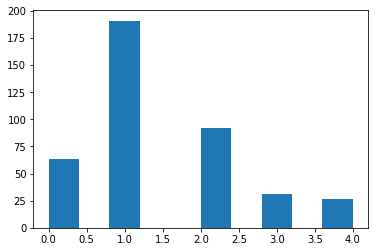

In [152]:
print(x_train_bb.shape)
print(x_similar.shape)
print(x_test.shape)
plt.hist(y_train_bb)
#plt.hist(y_similar)
#plt.hist(y_test)
scores = np.zeros(2)

In [153]:
NeuralBlackBox = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=20000, random_state = seed, n_iter_no_change=100)

NeuralBlackBox.fit(x_train_bb, y_train_bb)
bb1 = NeuralBlackBox

print(NeuralBlackBox.get_params(deep=True))
print("TrainScore: How good is the training data classified by the black box")
print(NeuralBlackBox.score(x_train_bb, y_train_bb, sample_weight=None))
print("SimilarScore: How good is the similar data classified by the black box")
print(NeuralBlackBox.score(x_similar, y_similar, sample_weight=None))
print("TestScore: How good is the test data classified by the black box")
print(NeuralBlackBox.score(x_test, y_test, sample_weight=None))

scores[0] = NeuralBlackBox.score(x_test, y_test, sample_weight=None)

{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 10, 10, 10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 20000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 2021, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
TrainScore: How good is the training data classified by the black box
0.7326732673267327
SimilarScore: How good is the similar data classified by the black box
0.7843137254901961
TestScore: How good is the test data classified by the black box
0.5882352941176471


In [154]:
RandomForestBlackBox = RandomForestClassifier(n_estimators=10)
RandomForestBlackBox.fit(x_train_bb, y_train_bb)
bb2 = RandomForestBlackBox

print(RandomForestBlackBox.get_params(deep=True))
print("TrainScore: How good is the training data classified by the black box")
print(RandomForestBlackBox.score(x_train_bb, y_train_bb, sample_weight=None))
print("SimilarScore: How good is the similar data classified by the black box")
print(RandomForestBlackBox.score(x_similar, y_similar, sample_weight=None))
print("TestScore: How good is the test data classified by the black box")
print(RandomForestBlackBox.score(x_test, y_test, sample_weight=None))

scores[1] = RandomForestBlackBox.score(x_test, y_test, sample_weight=None)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
TrainScore: How good is the training data classified by the black box
0.9900990099009901
SimilarScore: How good is the similar data classified by the black box
0.6666666666666666
TestScore: How good is the test data classified by the black box
0.7843137254901961


In [155]:
print(scores)

[0.58823529 0.78431373]


In [ ]:
#np.random.seed(seed)
k_seed = 50
BlackBox = bb1
s_bb = 'NN'

results_a = [None] * k_seed
results_a_proz = [None] * k_seed
results_improv_a = [None] * k_seed

for i_seed in range(k_seed):
    i_sample = i_seed % x_test.shape[0]
    x_Sample = x_test[i_sample]
    print(x_Sample)
    ExampleInstance = x_Sample
    target = -1
    
    #Combi
    x_250_RandomUniform = RandomFromMinMaxUniform(MinMax_2d(x_train_bb), 500, seed)
    x_250_SynthDistAll = DensityApproximation(x_train_bb, 500, seed)
    x_1000 = np.vstack([x_250_RandomUniform,x_250_SynthDistAll])
    s_draw = 'Combi'
    
    #Uniform
    #x_1000 = RandomFromMinMaxUniform(MinMax_2d(x_train_bb), 2000, seed)
    #s_draw = 'Uniform'
    
    #Density
    #x_1000 = DensityApproximation(x_train_bb, 1000, seed)
    #s_draw = 'Density'
    
    x_bb_test = x_test
    y_bb_test = BlackBox.predict(x_bb_test)
    yff_bb_test = foil_classification_s(y_bb_test, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

    x_GenAlgo_Gen0  = x_1000
    y_GenAlgo_Gen0 = BlackBox.predict(x_GenAlgo_Gen0)
    yff_GenAlgo_Gen0 = foil_classification_s(y_GenAlgo_Gen0, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)
    
    LocalFoilTree_Gen0 = tree.DecisionTreeClassifier()
    LocalFoilTree_Gen0.fit(x_GenAlgo_Gen0, yff_GenAlgo_Gen0)
    
    seed = 2021 + i_seed

    k_fact = 16
    k_foil = 16
    #l = [None] * 10
    x_GenAlgo_fact_a = [None] * k_fact
    x_GenAlgo_foil_a = [None] * k_foil
    for i_fact in range(k_fact):
        np.random.seed(seed)
        x_GenAlgo_fact_a[i_fact] = GenAlgo(x_1000, ExampleInstance, MinMax_2d(x_train_bb), 1, BlackBox, 2000, i_fact, 0.20 ,0.20, target = target)
    for i_foil in range(k_foil):
        np.random.seed(seed)
        x_GenAlgo_foil_a[i_foil] = GenAlgo(x_1000, ExampleInstance, MinMax_2d(x_train_bb), 0, BlackBox, 2000, i_foil, 0.20 ,0.20, target = target)



        
    results = np.zeros([k_fact,k_foil])
    results_improv = np.zeros([k_fact,k_foil])
    for i_fact in range(k_fact):
        for i_foil in range(k_foil):
            x_GenAlgo_fact = x_GenAlgo_fact_a[i_fact]
            x_GenAlgo_foil = x_GenAlgo_foil_a[i_foil]

            np.random.seed(seed)
            x_GenAlgo  = np.vstack([x_GenAlgo_fact,x_GenAlgo_foil])
            y_GenAlgo = BlackBox.predict(x_GenAlgo)
            yff_GenAlgo = foil_classification_s(y_GenAlgo, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

            LocalFoilTree = tree.DecisionTreeClassifier()
            LocalFoilTree.fit(x_GenAlgo, yff_GenAlgo)

            #print(LocalFoilTree.get_params(deep=True))
            #print('FoilTree score on GenAlgo training data:')
            #print(LocalFoilTree.score(x_GenAlgo, yff_GenAlgo, sample_weight=None))

            #x_test (is initialized above)
            y_bb_test = BlackBox.predict(x_test)
            yff_bb_test = foil_classification_s(y_bb_test, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

            #print(LocalFoilTree.get_params(deep=True))

            print(LocalFoilTree.score(x_test, yff_bb_test, sample_weight=None))
            #print('FoilTree score (Gen %s) around example instance data: %s'%(i,results[i]))


            SingleSample = x_Sample

            n_nodes = LocalFoilTree.tree_.node_count
            children_left = LocalFoilTree.tree_.children_left
            children_right = LocalFoilTree.tree_.children_right
            leaf_values = LocalFoilTree.tree_.value
            classes = LocalFoilTree.classes_


            feature = LocalFoilTree.tree_.feature
            threshold = LocalFoilTree.tree_.threshold
            parent = np.zeros(children_left.shape, dtype=int)
            wrongway = np.zeros(children_left.shape, dtype=int)
            leaf_value = np.zeros(children_left.shape, dtype=int)
            leaf_might = np.zeros(children_left.shape, dtype=int)
            distance_factleaf = np.zeros(children_left.shape, dtype=int)
            #print(distance_factleaf)
            distance_factleaf.fill(-1)
            #print(distance_factleaf)


            for i_nodes in range(n_nodes):
                parent[children_left[i_nodes]] = i_nodes
                parent[children_right[i_nodes]] = i_nodes
                if feature[i_nodes] != -2:

                    if SingleSample[feature[i_nodes]] <= threshold[i_nodes]:
                        wrongway[children_left[i_nodes]] = wrongway[i_nodes] 
                        wrongway[children_right[i_nodes]] = wrongway[i_nodes] + 1
                    else:
                        wrongway[children_left[i_nodes]] = wrongway[i_nodes] + 1
                        wrongway[children_right[i_nodes]] = wrongway[i_nodes]
                else:
                    leaf_value[i_nodes] = classes[np.argmax(leaf_values[i_nodes])]
                    leaf_might[i_nodes] = np.sum(leaf_values[i_nodes])

            for i_nodes in range(n_nodes):
                if children_left[i_nodes] == -1:
                    if wrongway[i_nodes] == 0:
                        fact_leaf = i_nodes


            distance_factleaf[fact_leaf] = 0
            for i_nodes in reversed(range(1,n_nodes)):
                if distance_factleaf[i_nodes] != -1:
                    distance_factleaf[parent[i_nodes]] = distance_factleaf[i_nodes] + 1
            #print(distance_factleaf)

            for i_nodes in range(n_nodes):
                if children_left[i_nodes] != -1:
                    if distance_factleaf[children_left[i_nodes]] == -1:
                        distance_factleaf[children_left[i_nodes]] = distance_factleaf[i_nodes] + 1
                    if distance_factleaf[children_right[i_nodes]] == -1:
                        distance_factleaf[children_right[i_nodes]] = distance_factleaf[i_nodes] + 1
            #print(distance_factleaf)

            #print(range(n_nodes))
            #print(parent)
            #print(children_left)
            #print(children_right)
            #print(feature)
            #print(threshold)
            #print(wrongway)
            #print(leaf_might)
            #print(leaf_value)
            #print(classes)
            #pd.options.display.float_format = '{:.2f}'.format
            #np.set_printoptions(suppress=True)
            #print(np.vstack([range(n_nodes),parent,children_left,children_right,feature,threshold,wrongway,leaf_might,leaf_value]))
            #print(fact_leaf)

            #print(SingleSample)
            CountFeatures = SingleSample.shape[0]
            #print(CountFeatures)
            TreeVsSampleDiff = np.zeros((CountFeatures, n_nodes))
            #print(TreeVsSampleDiff)

            for i_nodes in range(n_nodes):
                feature_Temp = feature[i_nodes].item()
                threshold_Temp = threshold[i_nodes].item()
                parent_Temp = parent[i_nodes].item()
                SingleSampleFeatureValue_Temp = SingleSample[feature_Temp].item()
                #print(SingleSampleFeatureValue_Temp)

                if children_left[i_nodes] == -1 and children_right[i_nodes] == -1:
                    #print("leaf node :%s" %(i_nodes))
                    continue
                for i_feature in feature:
                    TreeVsSampleDiff[i_feature , children_right[i_nodes]] = TreeVsSampleDiff[i_feature , i_nodes]
                    TreeVsSampleDiff[i_feature , children_left[i_nodes]] = TreeVsSampleDiff[i_feature , i_nodes]


                if SingleSampleFeatureValue_Temp + TreeVsSampleDiff[feature_Temp, parent_Temp].item()  <= threshold_Temp:
                    TreeVsSampleDiff[feature_Temp , children_right[i_nodes]] = threshold_Temp - SingleSampleFeatureValue_Temp
                    #print("Would be right with difference :( %s -%s ) at feature %s" % (threshold_Temp, SingleSampleFeatureValue_Temp, feature_Temp) )
                else:
                    TreeVsSampleDiff[feature_Temp , children_left[i_nodes]] =  threshold_Temp - SingleSampleFeatureValue_Temp
                    #print("Would be left with difference :( %s -%s ) at feature %s" % (threshold_Temp, SingleSampleFeatureValue_Temp, feature_Temp) )

            #print(SingleSample)
            TreeVsSampleTotalDiff = np.sum(abs(TreeVsSampleDiff), axis = 0)
            #print(TreeVsSampleTotalDiff)
            #print(TreeVsSampleDiff)
            #print(children_left)
            #print(leaf_value)
            #print(np.vstack([TreeVsSampleDiff,TreeVsSampleTotalDiff,wrongway,children_left,leaf_value]))

            might_threshold = math.ceil(x_GenAlgo.shape[0] *0.05)
            foil_TreeVsSampleTotalDiff = TreeVsSampleTotalDiff[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
            foil_TreeVsSampleDiff = TreeVsSampleDiff[:,(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
            foil_wrongway = wrongway[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
            foil_distancefactleaf = distance_factleaf[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
            foil_leaf_might = leaf_might[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]

            #print(foil_TreeVsSampleDiff)
            #print(foil_TreeVsSampleTotalDiff)
            #print(foil_wrongway)

            #ind_sort = np.lexsort((foil_TreeVsSampleTotalDiff,foil_wrongway)) # Sort by foil_wrongway, then by foil_TreeVsSampleTotalDiff
            ind_sort = np.lexsort((foil_TreeVsSampleTotalDiff,foil_distancefactleaf)) # Sort by foil_distancefactleaf, then by foil_TreeVsSampleTotalDiff

            foil_sort_TreeVsSampleDiff = foil_TreeVsSampleDiff[:,ind_sort]
            foil_sort_TreeVsSampleTotalDiff = foil_TreeVsSampleTotalDiff[ind_sort]
            foil_sort_wrongway = foil_wrongway[ind_sort]
            foil_distancefactleaf = foil_distancefactleaf[ind_sort]
            foil_sort_leaf_might = foil_leaf_might[ind_sort]

            #print(foil_sort_TreeVsSampleDiff)
            #print(foil_sort_TreeVsSampleTotalDiff)
            #print(foil_sort_wrongway)


            i_near = 2
            if i_near >= foil_sort_TreeVsSampleDiff.shape[1]:
                i_near = foil_sort_TreeVsSampleDiff.shape[1]

            for i_temp_near in range(i_near):
                #print(i_temp_near)
                print("The blackbox would classify the user input as the foil class if: (might = %s)" % (foil_sort_leaf_might[i_temp_near]))
                for i_feature in range(foil_sort_TreeVsSampleDiff.shape[0]):
                    feature_diff = foil_sort_TreeVsSampleDiff[i_feature,i_temp_near]

                    boolean_first = True
                    string_and = ""
                    if feature_diff != 0:
                        if boolean_first == False:
                            string_and = "and "
                        if feature_diff < 0:
                            print("-%sfeature %s (%s) would be more than %s lower" % (string_and,i_feature,attributes[i_feature],abs(feature_diff.round(3))))
                            boolean_first = False
                        if feature_diff > 0:
                            print("-%sfeature %s (%s) would be more than %s higher" % (string_and,i_feature,attributes[i_feature],abs(feature_diff.round(3))))
                            boolean_first = False


            x_Sample_border = x_Sample + foil_sort_TreeVsSampleDiff[:,0].T
            #print(x_Sample)
            #print(foil_sort_TreeVsSampleDiff[:,0].T)
            #print(x_sample_border)
            #print(foil_sort_TreeVsSampleDiff.shape[1])

            for i_test in range(i_near):
                #print(x_sample)
                x_diff = foil_sort_TreeVsSampleDiff[:,i_test].T
                #print(x_diff)
                x_sample_diff09 = x_Sample+(x_diff*0.8)
                x_sample_diff10 = x_Sample+(x_diff*1.0)
                x_sample_diff11 = x_Sample+(x_diff*1.2)
                #print(x_sample_diff)
                print("0.0:%s;0.9:%s;1.0:%s ;1.1:%s" % (BlackBox.predict(np.atleast_2d(x_Sample)),BlackBox.predict(np.atleast_2d(x_sample_diff09)),BlackBox.predict(np.atleast_2d(x_sample_diff10)),BlackBox.predict(np.atleast_2d(x_sample_diff11))))          



            x_bb_test_border = RandomAroundSampleNormal(x_Sample_border,MinMax_2d(x_train_bb),1000,seed, 0.05)

            #x_bb_test_border (is initialized above)
            y_bb_test_border = BlackBox.predict(x_bb_test_border)
            yff_bb_test_border = foil_classification_s(y_bb_test_border, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

            
            y_lt_test_border = LocalFoilTree.predict(x_bb_test_border)
            
            #print(LocalFoilTree.get_params(deep=True))
            LocalScoreMultiplier_BB = np.count_nonzero(yff_bb_test_border == 0) * np.count_nonzero(yff_bb_test_border == 1)
            LocalScoreMultiplier_FT = np.count_nonzero(y_lt_test_border == 0) * np.count_nonzero(y_lt_test_border == 1)
            LocalScoreMultiplier_Quot = pow( x_bb_test_border.shape[0] / 2 , 2)
            LocalScoreMultiplier =  (LocalScoreMultiplier_BB + LocalScoreMultiplier_FT) / (LocalScoreMultiplier_Quot * 2)
            
            results_global = LocalFoilTree.score(x_bb_test, yff_bb_test, sample_weight=None)
            results[i_fact, i_foil] = LocalFoilTree.score(x_bb_test_border, yff_bb_test_border, sample_weight=None)
            results_Gen0 = LocalFoilTree_Gen0.score(x_bb_test_border, yff_bb_test_border, sample_weight=None)
            results_improv[i_fact, i_foil] = results[i_fact, i_foil] / results_Gen0
            results_multi = results[i_fact, i_foil]*results_global
            
            #print('i_fact: %s ; i_foil: %s ; results Global: %s ; results Local: %s ; results mult: %s   BB:(0: %s; 1: %s)FT:(0: %s; 1: %s) %s' % (i_fact, i_foil,results_global,results[i_fact, i_foil],results_multi,np.count_nonzero(yff_bb_test_border == 0),np.count_nonzero(yff_bb_test_border == 1),np.count_nonzero(y_lt_test_border == 0),np.count_nonzero(y_lt_test_border == 1),LocalScoreMultiplier ))
            print('i_fact: %s ; i_foil: %s ; results Local: %s ; impr: %s  BB:(0: %s; 1: %s)FT:(0: %s; 1: %s) %s' % (i_fact, i_foil,results[i_fact, i_foil],results_improv[i_fact, i_foil],np.count_nonzero(yff_bb_test_border == 0),np.count_nonzero(yff_bb_test_border == 1),np.count_nonzero(y_lt_test_border == 0),np.count_nonzero(y_lt_test_border == 1),results_Gen0 ))
            
            results_a[i_seed] = results
            results_improv_a[i_seed] = results_improv
            results_a_proz[i_seed] = results_a[i_seed] / results_a[i_seed][0,0]
            print('%s -----------------------------------------------------------' %(i_seed))
print(results)


In [158]:
results_improv_a
#x_bb_test_border[0:20]
#x_GenAlgo_fact = x_GenAlgo_fact_a[i_fact]
#x_GenAlgo_foil = x_GenAlgo_foil_a[i_foil]

#np.random.seed(seed)
#x_GenAlgo1  = x_test[0:3]
#y_GenAlgo1 = BlackBox.predict(x_GenAlgo1)
#yff_GenAlgo1 = foil_classification_s(y_GenAlgo1, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)
#y_GenAlgo1

[array([[1.05447942, 1.01575758, 1.05454545, 0.95030303, 0.29350649,
         0.95030303, 0.90898058, 0.89281364, 1.01948843, 0.9001218 ,
         0.95151515, 1.02424242, 0.93954051, 0.93939394, 0.41484185,
         0.49696233],
        [1.05078597, 1.0472155 , 1.03753027, 1.04237288, 0.78023407,
         1.00847458, 0.75714286, 0.99515738, 1.01333333, 0.71375921,
         1.04237288, 1.01694915, 0.88097887, 0.69727047, 0.64884569,
         0.63791009],
        [1.05205811, 1.04606061, 1.05090909, 1.04242424, 0.97090909,
         1.03030303, 1.00848485, 0.95151515, 1.01212121, 1.01244813,
         1.04121212, 0.99636364, 1.00604595, 0.70347395, 0.70595383,
         0.70716889],
        [1.05078597, 1.0472155 , 1.04600484, 0.93258427, 1.062954  ,
         1.05205811, 1.02179177, 0.95399516, 0.69380316, 0.47931526,
         1.02905569, 1.031477  , 0.76410256, 0.70343137, 0.70595383,
         0.68529769],
        [1.00362757, 1.01089588, 0.73234201, 0.7063197 , 1.03753027,
         1.0108

In [159]:
#print(results_a[0])
#print('new')
results_all = results_a[0]
results_all_proz_mid = results_a_proz[0]
results_improv = results_improv_a[0]
for i_counter in range(1, len(results_a)):
    results_all = results_all + results_a[i_counter]
    results_all_proz_mid = results_all_proz_mid + results_a_proz[i_counter]
    results_improv = results_improv + results_improv_a[i_counter]
    
results_all = results_all / len(results_a)
results_all_proz_mid = results_all_proz_mid / len(results_a)
results_all_proz = results_all / results_all[0,0]
results_improv = results_improv / len(results_a)

print(results_all)
print('')
print(results_all_proz)
print('')
print(results_all_proz_mid)
print('')
print(results_improv)


[[0.68423404 0.66744681 0.66034043 0.662      0.63148936 0.65238298
  0.65208511 0.65748936 0.67914894 0.67046809 0.67212766 0.63908511
  0.63391489 0.59991489 0.60851064 0.62165957]
 [0.72655319 0.72844681 0.69508511 0.72597872 0.7282766  0.70348936
  0.73095745 0.73376596 0.73804255 0.71991489 0.72889362 0.73019149
  0.72021277 0.69453191 0.66531915 0.6492766 ]
 [0.70180851 0.72310638 0.71493617 0.71674468 0.72957447 0.70793617
  0.73755319 0.73089362 0.73146809 0.73244681 0.73959574 0.732
  0.70593617 0.70676596 0.70634043 0.68917021]
 [0.68493617 0.71453191 0.72391489 0.73255319 0.72870213 0.74759574
  0.71976596 0.72780851 0.74468085 0.7397234  0.73946809 0.72223404
  0.71706383 0.69251064 0.70642553 0.73351064]
 [0.68602128 0.70948936 0.71453191 0.71619149 0.72510638 0.7186383
  0.74485106 0.74129787 0.74119149 0.7303617  0.73814894 0.75125532
  0.73548936 0.7182766  0.71823404 0.73034043]
 [0.69997872 0.72351064 0.72095745 0.70623404 0.73551064 0.73787234
  0.75034043 0.75514894

In [160]:
df_results_all = pd.DataFrame (results_all)
df_results_all_proz = pd.DataFrame (results_all_proz)
df_results_all_proz_mid = pd.DataFrame (results_all_proz_mid)
df_results_improv = pd.DataFrame (results_improv)
s_seed = str(k_seed)
## save to xlsx file

filepath = 'df_results_all ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_all.to_excel(filepath, index=False)

filepath = 'df_results_all_proz ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_all_proz.to_excel(filepath, index=False)

filepath = 'df_results_all_proz_mid ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_all_proz_mid.to_excel(filepath, index=False)

filepath = 'df_results_improv ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_improv.to_excel(filepath, index=False)